In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as scp
import numpy as np
import astropy.io as ast
from astropy.io import ascii

In [3]:
frederick = pd.read_csv("GlobalLandTemperaturesByState.csv")
print(frederick)

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1855-05-01              25.544                          1.171   
1       1855-06-01              24.228                          1.103   
2       1855-07-01              24.371                          1.044   
3       1855-08-01              25.427                          1.073   
4       1855-09-01              25.675                          1.014   
...            ...                 ...                            ...   
645670  2013-05-01              21.634                          0.578   
645671  2013-06-01              24.679                          0.596   
645672  2013-07-01              29.272                          1.340   
645673  2013-08-01              29.202                          0.869   
645674  2013-09-01                 NaN                            NaN   

           State Country  
0           Acre  Brazil  
1           Acre  Brazil  
2           Acre  Brazil  
3           Acr

In [4]:
df = pd.DataFrame(frederick)
remove_column1 = df.pop('Country')
remove_column2 = df.pop('AverageTemperatureUncertainty')
df2 =frederick.loc[:, ['dt', 'AverageTemperature', 'State']]
i = 0
newdf = df2.loc[df2['dt']>'2000']
new3df = newdf.loc[newdf['State'] == 'Nebraska']
new4df = newdf.loc[newdf['State'] == 'South Dakota']
new2df = newdf.loc[newdf['State'] == 'Wyoming']
frames = [new2df, new3df, new4df]
result = pd.concat(frames)
result2 = result.loc[:,['dt','AverageTemperature']]
result3 = result2.groupby(['dt'], as_index=False).mean()
result3

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


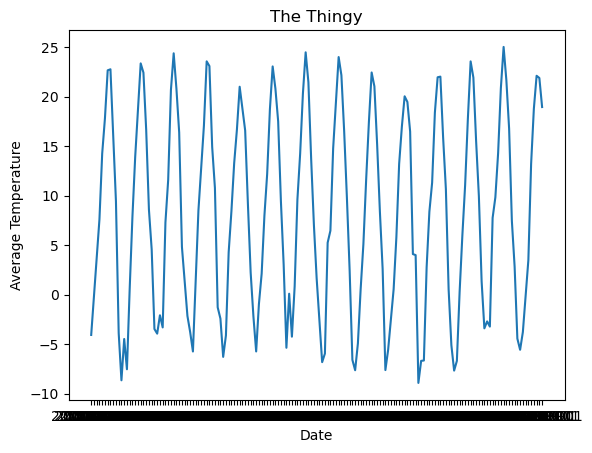

In [5]:
x = result3.loc[:,'dt']
y = result3.loc[:,'AverageTemperature']
plt.figure()
plt.plot(x,y)
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.title("The Thingy")
plt.show()

In [18]:
result3["Date"] = pd.to_datetime(result3.loc[:,"dt"])
result3["year"] = result3["Date"].dt.year
result3["month"]= result3["Date"].dt.month
result3["day"] = result3["Date"].dt.day
Datetime = result3
Datetime

,dt,AverageTemperature,Date,year,month,day
0,2000-01-01,-4.072000,2000-01-01,2000,1,1
1,2000-02-01,-0.205000,2000-02-01,2000,2,1
2,2000-03-01,3.642667,2000-03-01,2000,3,1
3,2000-04-01,7.609667,2000-04-01,2000,4,1
4,2000-05-01,14.255000,2000-05-01,2000,5,1
...,...,...,...,...,...,...
160,2013-05-01,13.196000,2013-05-01,2013,5,1
161,2013-06-01,18.783667,2013-06-01,2013,6,1
162,2013-07-01,22.110333,2013-07-01,2013,7,1
163,2013-08-01,21.890000,2013-08-01,2013,8,1


In [46]:
def fomuler (x,y,z,w,a):
    return y*x**2+z*x+w+a*np.cos(2*np.pi*x)
Param_Iguess = np.array([1,2,3,4])

In [47]:
u = (Datetime['year'] + (Datetime['month'] - 1)/12).values
y = Datetime['AverageTemperature'].values
params_opt, params_cov = scp.curve_fit(fomuler, u, y, p0 = Param_Iguess)
ufit = np.linspace(u.min(),u.max(),2500)
y_fit = fomuler(ufit, *params_opt)

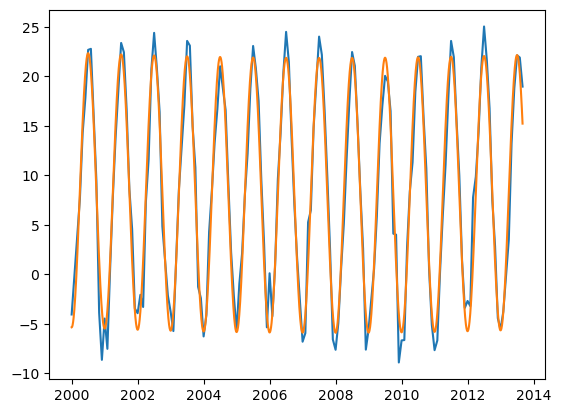

In [48]:

plt.figure()
plt.plot(u,y)
plt.plot(ufit,y_fit)
plt.show()

In [52]:
param_errors = np.sqrt(np.diag(params_cov))
param_errors

array([1.18430425e-02, 4.75340068e+01, 4.76962472e+04, 2.35478230e-01])

In [54]:
for i, (param, error) in enumerate(zip(['a','b','c','d'],param_errors)):
    print(f"Parameter {param}: {params_opt[i]} +/- {error}")

Parameter a: 0.009028815030080925 +/- 0.011843042509544158
Parameter b: -36.25635615386516 +/- 47.534006766379065
Parameter c: 36405.966349837785 +/- 47696.24719871661
Parameter d: -13.881477348087602 +/- 0.23547822996853568


In [42]:
Global = ast.ascii.read("global_SF6_MM.dat")
df_Global = Global.to_pandas()
u = (df_Global['SF6ottoyr'] + (df_Global['SF6ottomon'] - 1)/12).values
df_Global["Date"] = u
dfGlobal = df_Global[["Date","SF6ottoGLm","SF6ottoGLsd"]]
print(dfGlobal)

            Date  SF6ottoGLm  SF6ottoGLsd
0    1995.000000       3.370        0.064
1    1995.083333       3.397        0.122
2    1995.166667       3.401        0.100
3    1995.250000       3.453        0.094
4    1995.333333       3.467        0.099
..           ...         ...          ...
223  2013.583333         NaN          NaN
224  2013.666667         NaN          NaN
225  2013.750000         NaN          NaN
226  2013.833333         NaN          NaN
227  2013.916667         NaN          NaN

[228 rows x 3 columns]


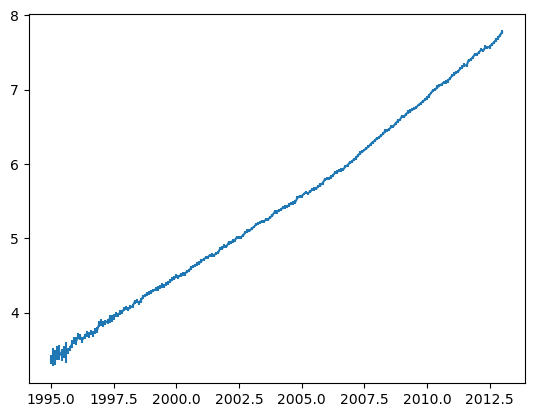

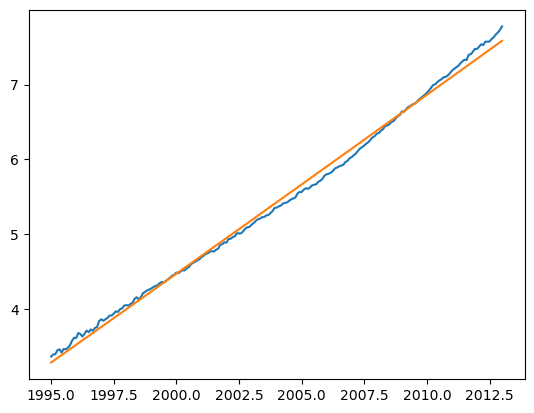

In [111]:
plt.figure()
x = dfGlobal["Date"]
y = dfGlobal["SF6ottoGLm"]
plt.errorbar(x,y,yerr = dfGlobal["SF6ottoGLsd"])
plt.show()
dfGlobal = dfGlobal[0:217]
Param_Uguess = np.array([1,2])
def LinFit (x,a,b,):
    return (a*x**2)+b*x
params_opt, params_cov = scp.curve_fit(LinFit, x, y,p0 = Param_Uguess)
ufit = np.linspace(x.min(),x.max(),2500)
y_fit = LinFit(ufit, *params_opt)
plt.figure()
plt.plot(x,y)
plt.plot(ufit,y_fit)
plt.show()

In [86]:
def ChiSq (y,y_fit):
    sumtotal = 0
    for i in range(217):
        sumtotal +=(y[i]-y_fit[i])**2
    return sumtotal/217

ChiSq(y,y_fit)

5.130212205337211

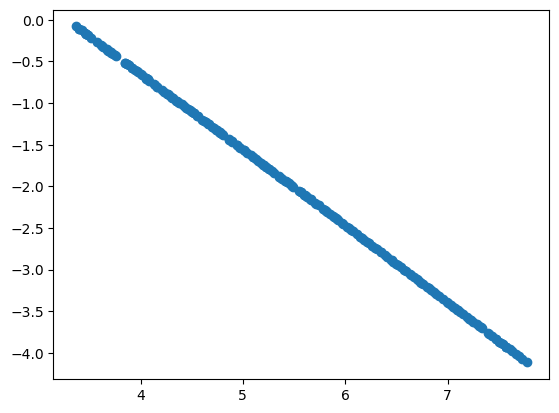

In [114]:
#A Linear model does not seem appropriate. 
plt.figure()
x = dfGlobal["Date"]
def yaxis(y_fit,y):
    ylist = []
    for i in range(217):
        Val = y_fit[i]-y[i]
        ylist.append(Val)
    return ylist
ylist = yaxis(y_fit,y)
plt.scatter(y, ylist)
plt.show()